# Load libraries and data

In [9]:
!pip install pyxlsb
!pip install optbinning
import pyxlsb
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from optbinning import OptimalBinning
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from scipy.sparse import csr_matrix
from scipy.stats import ttest_ind
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import ElasticNetCV
from scipy.stats import f_oneway
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.svm import OneClassSVM
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
import warnings
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import IsolationForest
from sklearn.utils import resample
from google.colab import drive
drive.mount('/content/drive')
warnings.filterwarnings("ignore", category=FutureWarning)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.9/213.9 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.1/28.1 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.8/302.8 kB 21.0 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydf 0.13.0 requires protobuf<7.0.0,>=5.29.1, but you have protobuf 5.26.1 which is incompatible.


Mounted at /content/drive


In [11]:
# Load data
datos_o = pd.read_excel('/content/drive/MyDrive/Prueba_Tigo/202412_base_prueba.xlsb', engine='pyxlsb')
datos_o.shape

(530559, 39)

### Calidad de datos y Formato variables


In [12]:
# Remove duplicates

df = datos_o.drop_duplicates()
df.shape

(530476, 39)

In [13]:
# Validate variable formats
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530476 entries, 0 to 530558
Data columns (total 39 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   User_ID              530476 non-null  int64  
 1   regional             530476 non-null  object 
 2   departamento         530476 non-null  object 
 3   ageing               530476 non-null  int64  
 4   data_usr             530476 non-null  object 
 5   TECHNOLOGY           530476 non-null  object 
 6   DEVICE_TECHNOLOGY    530476 non-null  object 
 7   DEVICE_SUBTYPE       530476 non-null  object 
 8   rev_tot              530476 non-null  float64
 9   data_mb              530476 non-null  float64
 10  conteo               94125 non-null   float64
 11  FECHA_COL_min        94125 non-null   float64
 12  FECHA_COL_max        94125 non-null   float64
 13  CX_CANCELACION       94125 non-null   float64
 14  CX_PETICIONES        94125 non-null   float64
 15  CX_SOP_TEC           9

In [14]:
print(df["FECHA_COL"].head(10)) # Show first rows
print(df["FECHA_COL"].dtype) # Type of data float

0    45444.0
1    45444.0
2    45444.0
3    45444.0
4    45444.0
5    45444.0
6    45444.0
7    45444.0
8    45444.0
9    45444.0
Name: FECHA_COL, dtype: float64
float64


In [15]:
df['FECHA_COL'] = pd.to_datetime(df['FECHA_COL'], origin='1899-12-30', unit='D')
df['FECHA_COL_min'] = pd.to_datetime(df['FECHA_COL_min'], origin='1899-12-30', unit='D')
df['FECHA_COL_max'] = pd.to_datetime(df['FECHA_COL_max'], origin='1899-12-30', unit='D')

/tmp/ipython-input-2611971545.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FECHA_COL'] = pd.to_datetime(df['FECHA_COL'], origin='1899-12-30', unit='D')
/tmp/ipython-input-2611971545.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FECHA_COL_min'] = pd.to_datetime(df['FECHA_COL_min'], origin='1899-12-30', unit='D')
/tmp/ipython-input-2611971545.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [16]:
# Function to classify types of columns
num_cols = df.select_dtypes(include=['number']).shape[1] # Numeric variables
cat_cols = df.select_dtypes(include=['object', 'category']).shape[1] # Categorical variables
date_cols = df.select_dtypes(include=['datetime']).shape[1] # Date variables

# Create summary table
tabla_resumen = pd.DataFrame({
    'Tipo de Variable': ['Numérica', 'Categórica', 'Fecha'],
    'Cantidad': [num_cols, cat_cols, date_cols]
})
tabla_resumen

,Tipo de Variable,Cantidad
0,Numérica,24
1,Categórica,12
2,Fecha,3


In [17]:
ultimos_registros_idx = df.groupby('User_ID')['User_ID'].idxmax()

# Filter the dataframe to keep only the registros selected
df = df.loc[ultimos_registros_idx]
df.shape

(500000, 39)

In [18]:
# Remove id
df = df.iloc[:,1:df.shape[1]]
df.head()

,regional,departamento,ageing,data_usr,TECHNOLOGY,DEVICE_TECHNOLOGY,DEVICE_SUBTYPE,rev_tot,data_mb,conteo,...,CANAL,NPS,TESPERA_SEG,TABANDONO_SEG,DURACION_SEG,TIEMPO_AHT,MUNICIPIO,PERFIL_DIGITAL,VECTOR_PAGO,GENERACION_MOVIL
0,SUR,QUINDÍO,8,N,4G,4G,ANDROID,1397.00,5697.4,1.0,...,canaltigo_mensajeria_whatsapp,NaN,0.0,0.0,0.0,625.0,RIOSUCIO,5- ACERTIJO,NaN,NaN
1,ANDINA,BOYACÁ,11,Y,4G,2G,IPHONE,32557.92,5910.3,1.0,...,canaltigo_mensajeria_whatsapp,NaN,0.0,0.0,0.0,164.0,RICAURTE,1- FULL DIGITAL,NaN,NaN
2,ANDINA,ANTIOQUIA,9,Y,4G,4G,ANDROID,36565.80,34771.7,3.0,...,canaltigo_mensajeria_whatsapp,NaN,0.0,0.0,0.0,873.0,COPACABANA,NaN,NaN,NaN
3,ANDINA,ANTIOQUIA,21,Y,5G,2G,IPHONE,20589.15,4222.1,3.0,...,canaltigo_mensajeria_whatsapp,NaN,0.0,0.0,0.0,NaN,MEDELLIN,NaN,NaN,NaN
4,COSTA,CÓRDOBA,9,Y,4G,2G,ANDROID,29835.04,4048.7,1.0,...,canaltigo_mensajeria_whatsapp,NaN,0.0,0.0,0.0,894.0,LORICA,3- HIBRIDO,NaN,NaN


## Exploratory Data Analysis (EDA)


In [19]:
# Categorical variables

for col in df.columns:
    print(f"\nVariable: {col}")
    print(f"Tipo de dato: {df[col].dtype}")

    freq_table = df[col].value_counts(dropna=False).reset_index()
    freq_table.columns = [col, "frecuencia"]

    print(freq_table.head(15).to_string(index=False)) # Top 15
    print(f"Total registros: {len(df)}")
    print(f"Nulos: {df[col].isnull().sum()}")
    print("-" * 50)


Variable: regional
Tipo de dato: object
        regional  frecuencia
          ANDINA      150742
           COSTA      139978
          BOGOTA      127717
             SUR       81283
TO BE DETERMINED         280
Total registros: 500000
Nulos: 0
--------------------------------------------------

Variable: departamento
Tipo de dato: object
   departamento  frecuencia
      ANTIOQUIA      120022
  BOGOTÁ, D. C.      103293
      ATLÁNTICO       50725
VALLE DEL CAUCA       30521
        BOLÍVAR       29333
   CUNDINAMARCA       24424
      SANTANDER       17977
        CÓRDOBA       16385
      MAGDALENA       16022
      RISARALDA       11970
          SUCRE       10507
         CALDAS       10252
          CESAR        8709
     LA GUAJIRA        8464
         TOLIMA        7224
Total registros: 500000
Nulos: 0
--------------------------------------------------

Variable: ageing
Tipo de dato: int64
 ageing  frecuencia
      6       21566
      7       19222
      8       18894
      

In [20]:
# Cross-tabulations vs churn
tabla_cruzada = pd.crosstab(df['churn'].map({0: 'No', 1: 'Sí'}), df['NPS'], margins=True, margins_name="Total",dropna=False)
tabla_cruzada

NPS,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,NaN,Total
churn,,,,,,,,,,,,,
No,184,44,22,23,19,68,39,65,156,250,840,497662,499372
Sí,1,0,1,0,0,0,0,0,0,0,0,626,628
Total,185,44,23,23,19,68,39,65,156,250,840,0,500000


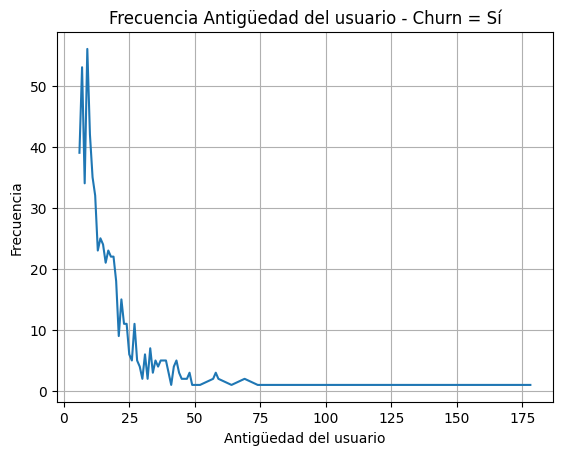

In [21]:
df_filtrado = df[df['churn'] == 1]

frecuencia = df_filtrado['ageing'].value_counts().sort_index()

# Plot frequency distribution
plt.plot(frecuencia.index, frecuencia.values)
plt.title('Frecuencia Antigüedad del usuario - Churn = Sí')
plt.xlabel('Antigüedad del usuario')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

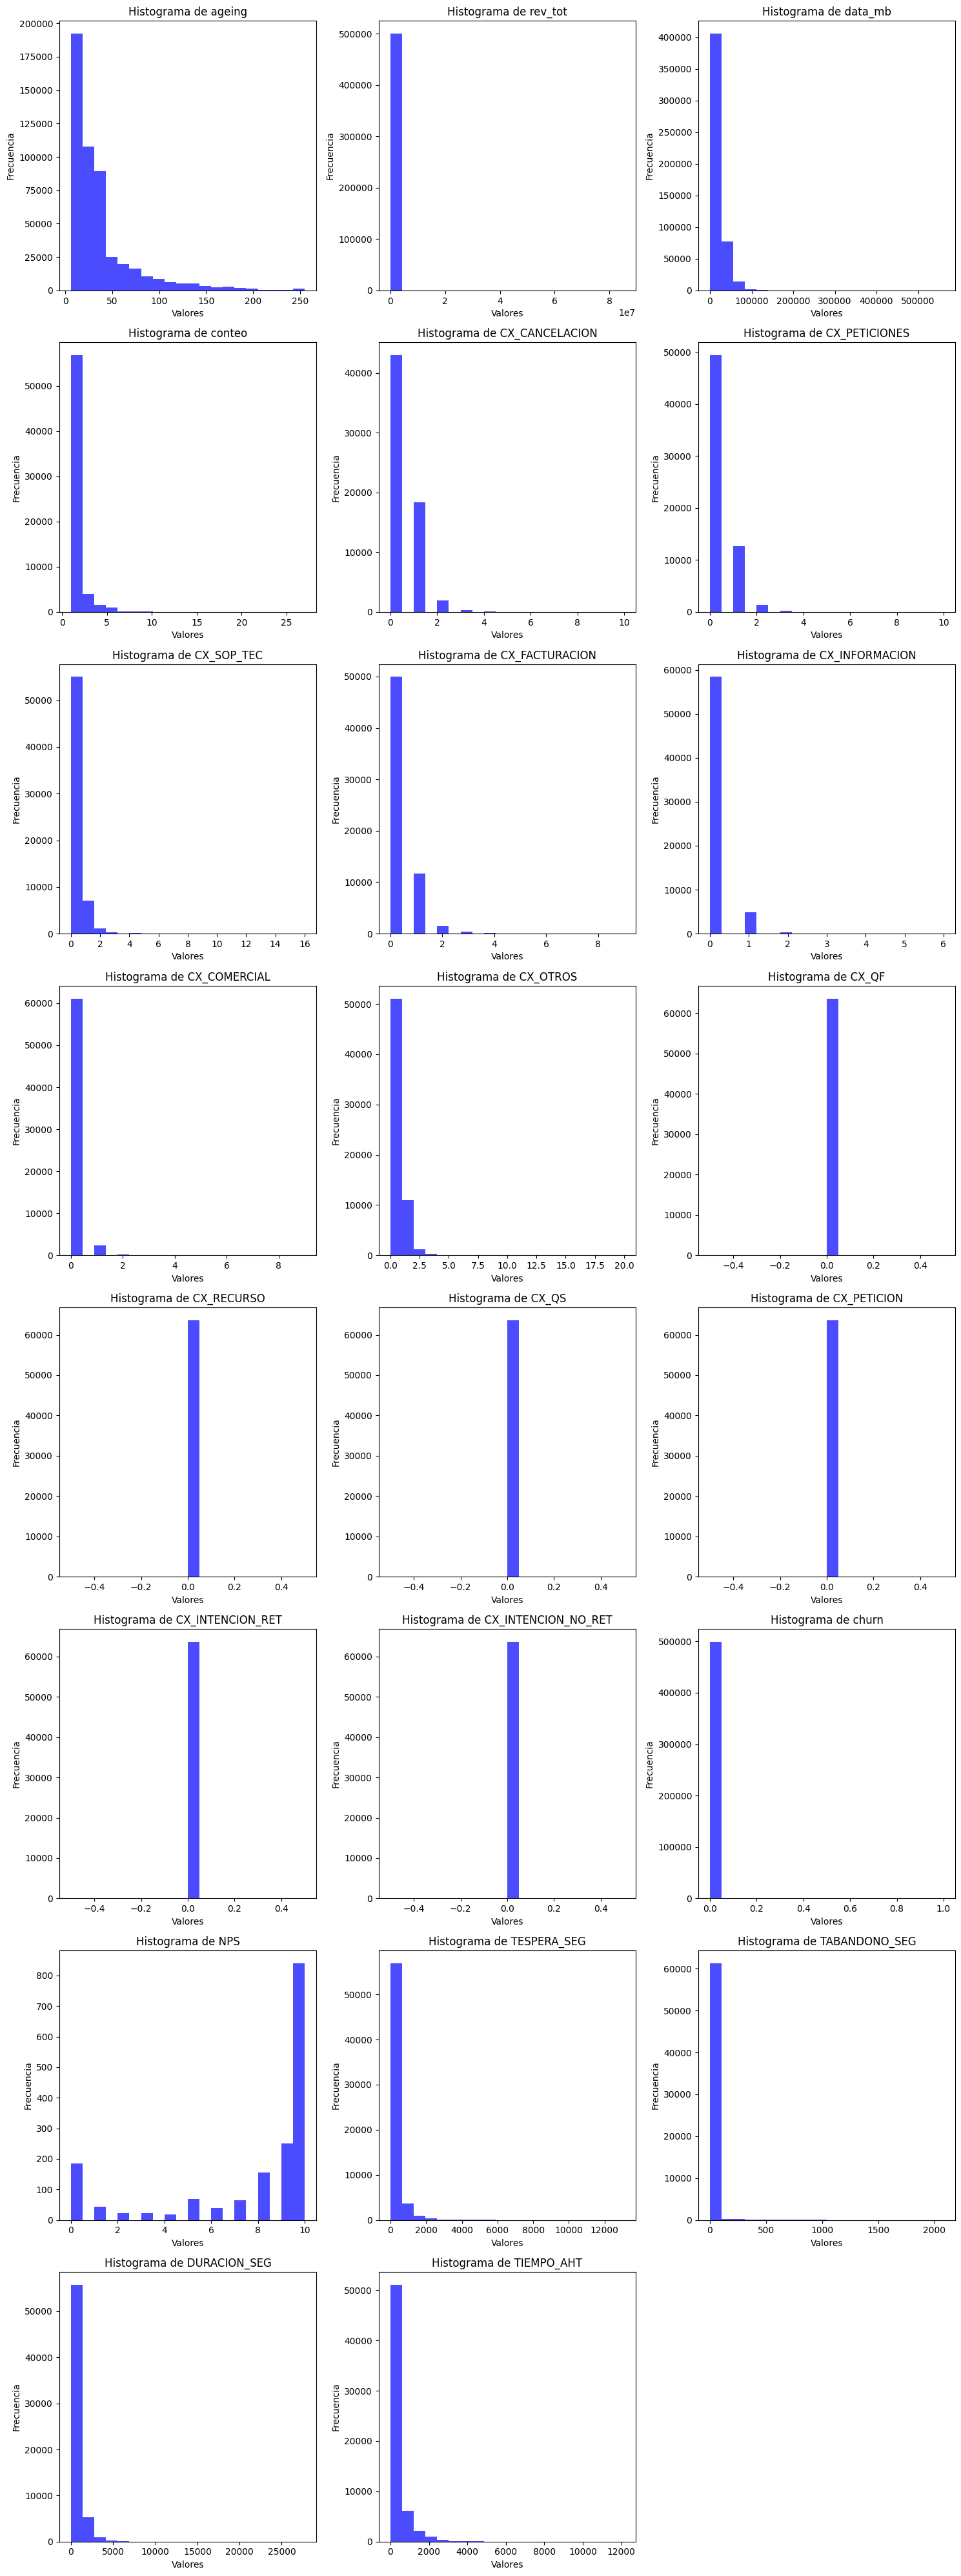

In [22]:
# Numeric variables
df_numeric = df.select_dtypes(include=['number'])

num_columns = len(df_numeric.columns)
cols_per_row = 3 # Number of plots per row
rows = (num_columns + cols_per_row - 1) // cols_per_row # Calculate required rows

fig, axes = plt.subplots(rows, cols_per_row, figsize=(15, 5 * rows))

# Ensure of handle subplots additional
axes = axes.flatten()

for i, col in enumerate(df_numeric.columns):
    axes[i].hist(df_numeric[col], bins=20, alpha=0.7, color='blue')
    axes[i].set_title(f'Histograma de {col}')
    axes[i].set_xlabel('Valores')
    axes[i].set_ylabel('Frecuencia')

# Hide empty subplots
for j in range(len(df_numeric.columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [23]:
# Variables that do not add variability to the analysis or to the models
df = df.drop(columns=['CX_QF', 'CX_RECURSO', 'CX_QS', 'CX_PETICION', 'CX_INTENCION_RET', 'CX_INTENCION_NO_RET'])

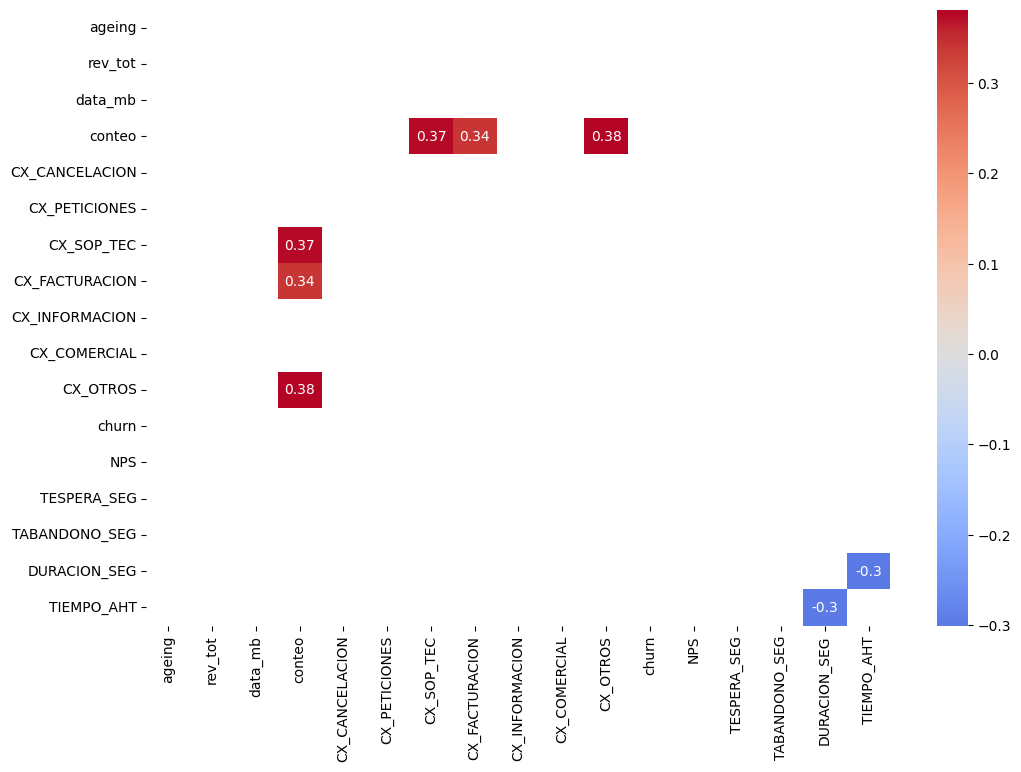

In [24]:
corr = df.select_dtypes(include=['number']).corr()

# Filter absolute correlations greater than 0.3 (for example)
mask = (abs(corr) >= 0.3) & (corr != 1.0)
plt.figure(figsize=(12,8))
sns.heatmap(corr[mask], annot=True, cmap="coolwarm", center=0)
plt.show()

## Calculate the NPS KPI

In [25]:
df['NPS_cat'] = pd.cut(df['NPS'],
                       bins=[-1, 6, 8, 10], # Define axis limits
                       labels=['Detractores', 'Neutros', 'Promotores']) # Category names

In [26]:
# Calculate the KPI using only non-null rows
total_respuestas = df['NPS_cat'].notnull().sum() # Total non-null data
promotores = df['NPS_cat'].value_counts().get('Promotores', 0) # Count of promoters
detractores = df['NPS_cat'].value_counts().get('Detractores', 0) # Count of detractors

# Formula kpi
kpi = ((promotores - detractores) / total_respuestas) * 100

# Show the result
print(f"KPI de NPS: {kpi:.2f}")

KPI de NPS: 40.25


In [27]:
kpi_por_region = df.groupby('regional').apply(lambda x: ((x['NPS_cat'].value_counts().get('Promotores', 0) - x['NPS_cat'].value_counts().get('Detractores', 0)) / x['NPS_cat'].notnull().sum()) * 100).reset_index(name='KPI')

# Show the result
print(kpi_por_region)

           regional        KPI
0            ANDINA  40.425532
1            BOGOTA  33.831776
2             COSTA  45.054945
3               SUR  45.608108
4  TO BE DETERMINED        NaN


/tmp/ipython-input-1608571709.py:1: RuntimeWarning: invalid value encountered in scalar divide
  kpi_por_region = df.groupby('regional').apply(lambda x: ((x['NPS_cat'].value_counts().get('Promotores', 0) - x['NPS_cat'].value_counts().get('Detractores', 0)) / x['NPS_cat'].notnull().sum()) * 100).reset_index(name='KPI')
/tmp/ipython-input-1608571709.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  kpi_por_region = df.groupby('regional').apply(lambda x: ((x['NPS_cat'].value_counts().get('Promotores', 0) - x['NPS_cat'].value_counts().get('Detractores', 0)) / x['NPS_cat'].notnull().sum()) * 100).reset_index(name='KPI')


In [28]:
kpi_por_categoria = df.groupby('CATEGORIA').apply(lambda x: ((x['NPS_cat'].value_counts().get('Promotores', 0) - x['NPS_cat'].value_counts().get('Detractores', 0)) / x['NPS_cat'].notnull().sum()) * 100).reset_index(name='KPI')

# Show the result
print(kpi_por_categoria)

         CATEGORIA        KPI
0       ABANDONADA -50.000000
1      CANCELACION  44.933921
2        COMERCIAL  64.516129
3     CONVERGENCIA        NaN
4      FACTURACION  36.614853
5      INFORMACION  36.538462
6            OTROS  17.948718
7       PETICIONES  52.941176
8  SOPORTE TECNICO  31.623932


/tmp/ipython-input-1723833711.py:1: RuntimeWarning: invalid value encountered in scalar divide
  kpi_por_categoria = df.groupby('CATEGORIA').apply(lambda x: ((x['NPS_cat'].value_counts().get('Promotores', 0) - x['NPS_cat'].value_counts().get('Detractores', 0)) / x['NPS_cat'].notnull().sum()) * 100).reset_index(name='KPI')
/tmp/ipython-input-1723833711.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  kpi_por_categoria = df.groupby('CATEGORIA').apply(lambda x: ((x['NPS_cat'].value_counts().get('Promotores', 0) - x['NPS_cat'].value_counts().get('Detractores', 0)) / x['NPS_cat'].notnull().sum()) * 100).reset_index(name='KPI')


## Contact Index

In [29]:
cont_ind = df['conteo'].sum() / len(df)
print(cont_ind)

0.19075


## Which variables influence user revenue?

In [30]:
# -------- 2) numeric correlations with revenue --------
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
num_cols = [c for c in num_cols if c != "rev_tot" and df[c].notna().any()]

corrs = (
    df[num_cols + ["rev_tot"]]
    .corr(method="spearman")["rev_tot"]
    .drop("rev_tot")
    .sort_values(ascending=False)
)
print("\nTop correlaciones (Spearman) con rev_tot:")
print(corrs.head(15))
print("\nBottom correlaciones:")
print(corrs.tail(15))


Top correlaciones (Spearman) con rev_tot:
ageing            0.321388
data_mb           0.163891
CX_SOP_TEC        0.078706
CX_PETICIONES     0.072899
CX_COMERCIAL      0.031702
CX_INFORMACION    0.006693
TABANDONO_SEG     0.006118
NPS              -0.000703
CX_FACTURACION   -0.006826
TIEMPO_AHT       -0.009137
churn            -0.010768
TESPERA_SEG      -0.016638
DURACION_SEG     -0.018176
conteo           -0.061236
CX_OTROS         -0.098976
Name: rev_tot, dtype: float64

Bottom correlaciones:
data_mb           0.163891
CX_SOP_TEC        0.078706
CX_PETICIONES     0.072899
CX_COMERCIAL      0.031702
CX_INFORMACION    0.006693
TABANDONO_SEG     0.006118
NPS              -0.000703
CX_FACTURACION   -0.006826
TIEMPO_AHT       -0.009137
churn            -0.010768
TESPERA_SEG      -0.016638
DURACION_SEG     -0.018176
conteo           -0.061236
CX_OTROS         -0.098976
CX_CANCELACION   -0.138934
Name: rev_tot, dtype: float64


In [31]:
# -------- 3) categorical: lift of revenue por category --------
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
cat_cols = [c for c in cat_cols if c not in ["User_ID"]]

overall_mean = df["rev_tot"].mean()
lift_tables = {}
for c in cat_cols:
    tmp = (
        df.groupby(c, dropna=False)["rev_tot"]
          .agg(mean_rev="mean", count="size")
          .assign(lift=lambda x: x["mean_rev"] / overall_mean)
          .sort_values("lift", ascending=False)
    )
    lift_tables[c] = tmp

print("\nEjemplo de lift por TECHNOLOGY:")
if "TECHNOLOGY" in lift_tables:
    print(lift_tables["TECHNOLOGY"].head(10))


Ejemplo de lift por TECHNOLOGY:
                mean_rev   count      lift
TECHNOLOGY                                
5G          46756.914217   67575  1.163284
2G          41938.520900    8349  1.043405
4G          39128.721171  418454  0.973499
3G          38000.225713    5622  0.945423


In [32]:
# ============================
# Clean variable selection
# ============================
X_clean = df.copy()

# 1) exclude categorical with too many categories
umbral_card = 50
high_card = [c for c in X_clean.select_dtypes(include=["object","category","bool"]).columns
             if df[c].nunique() > umbral_card]
print("Categorías excluidas por alta cardinalidad:", high_card)
X_clean = X_clean.drop(columns=high_card)

# 2) exclude near-constant numeric features (no variability)
low_var = [c for c in X_clean.select_dtypes(include=[np.number]).columns
           if df[c].nunique() <= 1]
print("Numéricas excluidas por baja variabilidad:", low_var)
X_clean = X_clean.drop(columns=low_var)

# 3) Exclude variables with too many nulls
umbral_nulls = 0.9 # 90% o more of nulos
high_nulls = [c for c in X_clean.columns if df[c].isnull().mean() > umbral_nulls]
print("Variables excluidas por exceso de nulos:", high_nulls)
X_clean = X_clean.drop(columns=high_nulls)

# ============================
# Final variables
# ============================
num_feats = X_clean.select_dtypes(include=[np.number]).columns.tolist()
cat_feats = X_clean.select_dtypes(include=["object","category","bool"]).columns.tolist()

print("\nVariables numéricas finales:", num_feats)
print("Variables categóricas finales:", cat_feats)

Categorías excluidas por alta cardinalidad: ['MUNICIPIO']
Numéricas excluidas por baja variabilidad: []
Variables excluidas por exceso de nulos: ['NPS', 'PERFIL_DIGITAL', 'VECTOR_PAGO', 'GENERACION_MOVIL', 'NPS_cat']

Variables numéricas finales: ['ageing', 'rev_tot', 'data_mb', 'conteo', 'CX_CANCELACION', 'CX_PETICIONES', 'CX_SOP_TEC', 'CX_FACTURACION', 'CX_INFORMACION', 'CX_COMERCIAL', 'CX_OTROS', 'churn', 'TESPERA_SEG', 'TABANDONO_SEG', 'DURACION_SEG', 'TIEMPO_AHT']
Variables categóricas finales: ['regional', 'departamento', 'data_usr', 'TECHNOLOGY', 'DEVICE_TECHNOLOGY', 'DEVICE_SUBTYPE', 'CATEGORIA', 'CANAL']


In [33]:
# Exclude experience variables, date variables, variables with many categories, and those that do not add variability.
drop_cols = ['MUNICIPIO','NPS', 'PERFIL_DIGITAL', 'VECTOR_PAGO', 'GENERACION_MOVIL', 'NPS_cat',
             'conteo', 'CX_CANCELACION', 'CX_PETICIONES', 'CX_SOP_TEC', 'CX_FACTURACION', 'CX_INFORMACION',
             'CX_COMERCIAL', 'CX_OTROS', 'churn', 'TESPERA_SEG', 'TABANDONO_SEG', 'DURACION_SEG', 'TIEMPO_AHT',
             'CATEGORIA','CANAL','FECHA_COL','FECHA_COL_min','FECHA_COL_max','departamento',
             "rev_tot","rev_log1p"]

In [34]:
df_model = df.copy()
df_model["rev_log1p"] = np.log1p(df_model["rev_tot"])

# Identify the categorical variables and the numeric variable
categorical_vars = df_model.drop(columns=[c for c in drop_cols if c in df_model.columns], errors="ignore").select_dtypes(include=['object', 'category']).columns
num_var = "rev_log1p"

# ANOVA results
results = []

# Perform anova to each variable categórica
for cat_var in categorical_vars:
# Ensure the variable has more than one category
    if df_model[cat_var].nunique() > 1:
# Separate the data por categories
        categories = [df_model[num_var][df_model[cat_var] == cat] for cat in df_model[cat_var].dropna().unique()]

# Calculate the means of each category
        medias_categoria = {cat: df_model[num_var][df_model[cat_var] == cat].mean() for cat in df_model[cat_var].dropna().unique()}

# Perform ANOVA if there are more than two categories
        if len(categories) > 1:
            f_stat, p_value = f_oneway(*categories)
            results.append({
                'Variable Categórica': cat_var,
                'Estadístico F': f_stat,
                'P-valor': p_value,
                'Medias por Categoría': medias_categoria
            })

# Convert the results into a DataFrame
anova_results = pd.DataFrame(results)

# Add column for interpretation of significance
anova_results['Significancia'] = anova_results['P-valor'].apply(lambda x: 'Significativo' if x < 0.05 else 'No significativo')

print(anova_results)

  Variable Categórica  Estadístico F  P-valor  \
0            regional    3156.451320      0.0   
1            data_usr  282980.766624      0.0   
2          TECHNOLOGY   28675.087609      0.0   
3   DEVICE_TECHNOLOGY     783.637191      0.0   
4      DEVICE_SUBTYPE    1511.008455      0.0   

                                Medias por Categoría  Significancia  
0  {'SUR': 10.262250467292128, 'ANDINA': 10.25335...  Significativo  
1  {'N': 4.489313601587452, 'Y': 10.393411078928885}  Significativo  
2  {'4G': 10.267705764480098, '5G': 10.6200253280...  Significativo  
3  {'4G': 10.131667300727337, '2G': 10.2983821626...  Significativo  
4  {'ANDROID': 10.184072003816341, 'IPHONE': 10.4...  Significativo  


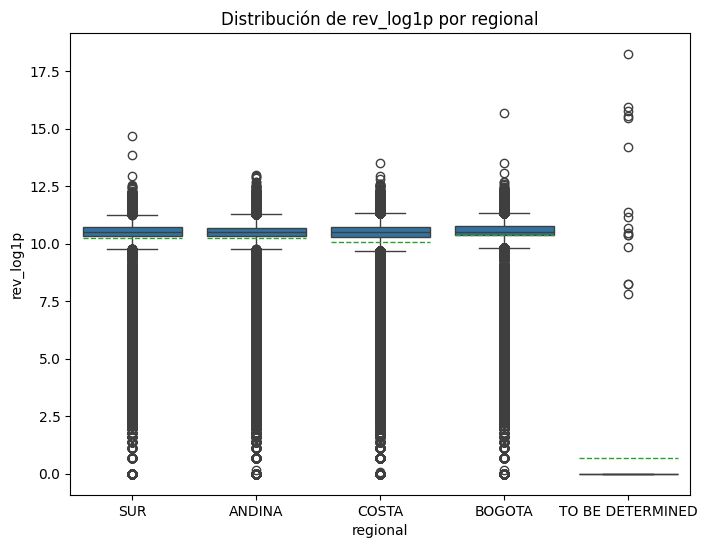

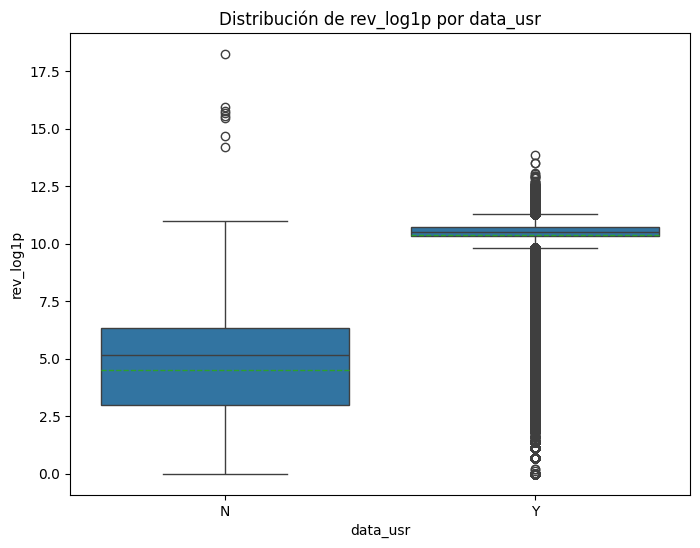

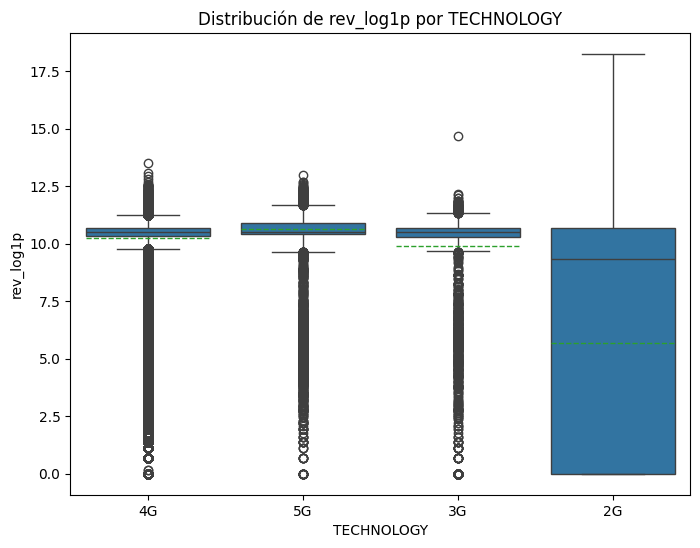

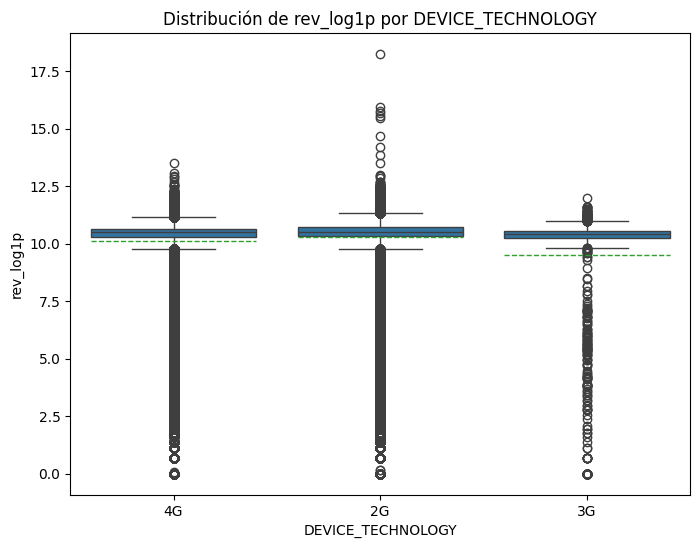

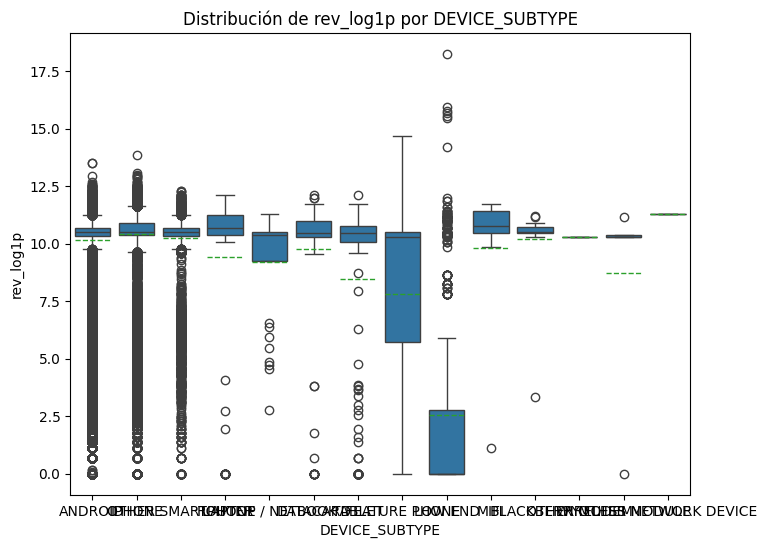

In [35]:

# Create a plot for each significant categorical variable
for cat_var in anova_results[anova_results['Significancia'] == 'Significativo']['Variable Categórica']:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=cat_var, y=num_var, data=df_model,meanline=True,showmeans=True)
    plt.title(f'Distribución de {num_var} por {cat_var}')
    plt.xlabel(cat_var)
    plt.ylabel(num_var)
    plt.show()

In [36]:
# Separate predictors and response variable
X = df_model.drop(columns=[c for c in drop_cols if c in df_model.columns], errors="ignore")
y = df_model["rev_log1p"]

In [37]:
# Identify columns categorical and numeric
cat_cols = X.select_dtypes(include=['object', 'category']).columns.to_list()
num_cols = X.select_dtypes(include=['float64', 'int']).columns.to_list()

# One-hot encoding
preprocessor = ColumnTransformer(
    transformers=[('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols)],
    remainder='passthrough'
)

# Apply to all data (no train/test since it is descriptive)
X_prep = preprocessor.fit_transform(X)

# Retrieve names of variables after one-hot encoding
encoded_cat = preprocessor.named_transformers_['onehot'].get_feature_names_out(cat_cols)
labels = np.concatenate([encoded_cat, num_cols])

# Convert to dataframe
X_prep = pd.DataFrame(X_prep.toarray(), columns=labels)

In [38]:
# ----------------------------
# Model descriptive (randomforest)
# ----------------------------
modelo = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1,
    max_depth=6 # Limit tree depth to improve interpretability
)
modelo.fit(X_prep, y)

# Feature importances
importancia = modelo.feature_importances_

importancia_df = pd.DataFrame({
    'Variable': X_prep.columns,
    'Importancia': importancia
}).sort_values(by='Importancia', ascending=False)

print(importancia_df.head(20))

                           Variable  Importancia
5                        data_usr_N     0.492821
29                          data_mb     0.292156
6                        data_usr_Y     0.173412
28                           ageing     0.025006
2                    regional_COSTA     0.009620
7                     TECHNOLOGY_2G     0.002763
24  DEVICE_SUBTYPE_OTHER SMARTPHONE     0.000786
18            DEVICE_SUBTYPE_IPHONE     0.000557
14           DEVICE_SUBTYPE_ANDROID     0.000471
17     DEVICE_SUBTYPE_FEATURE PHONE     0.000407
9                     TECHNOLOGY_4G     0.000366
4         regional_TO BE DETERMINED     0.000327
20           DEVICE_SUBTYPE_LOW END     0.000320
0                   regional_ANDINA     0.000233
12             DEVICE_TECHNOLOGY_3G     0.000162
1                   regional_BOGOTA     0.000154
26            DEVICE_SUBTYPE_TABLET     0.000105
3                      regional_SUR     0.000091
8                     TECHNOLOGY_3G     0.000086
13             DEVIC

## Which category (reason for the customer’s call) has the highest churn rate?

In [39]:
contingency_table = pd.crosstab(df['churn'], df['CATEGORIA'])
tabla_relativa = contingency_table.div(contingency_table.sum(axis=0), axis=1) * 100
tabla_relativa

CATEGORIA,ABANDONADA,CANCELACION,COMERCIAL,CONVERGENCIA,FACTURACION,INFORMACION,OTROS,PETICIONES,SOPORTE TECNICO
churn,,,,,,,,,
0,99.6139,99.554473,99.944165,100.0,99.779533,99.770181,99.710414,99.846446,99.774402
1,0.3861,0.445527,0.055835,0.0,0.220467,0.229819,0.289586,0.153554,0.225598


## Machine learning models


In [40]:


# ==============================================
# 1. copy of the dataset and exclusion of unused variables
# ==============================================
df_model = df.copy()

variables_excluidas = ['churn','FECHA_COL','FECHA_COL_min','FECHA_COL_max',
                       'MUNICIPIO','departamento','PERFIL_DIGITAL']

# Save target before excluding columns
target = 'churn'
label_encoder = LabelEncoder()
df_model[target] = label_encoder.fit_transform(df_model[target])

# Keep only the columns used in the model
X_df = df_model.drop(columns=[c for c in variables_excluidas if c in df_model.columns])
y = df_model[target]

# ==============================================
# 2. Function to apply optimal binning with WOE
# ==============================================
def optimal_binning_transform(df, feature, target, dtype="numerical"):
    optb = OptimalBinning(name=feature, dtype=dtype, solver="cp")
    optb.fit(df[feature], df[target])
    woe_values = optb.transform(df[feature], metric="woe")
    return woe_values

# ==============================================
# 3. identify variables
# ==============================================
num_cols = X_df.select_dtypes(include=['float64','int64']).columns
cat_cols = X_df.select_dtypes(include=['object','category']).columns

# ==============================================
# 4. WOE transformation
# ==============================================
for col in num_cols:
    print(f"Procesando numérica: {col}")
    X_df[col] = optimal_binning_transform(df_model, col, target, dtype="numerical")

for col in cat_cols:
    print(f"Procesando categórica: {col}")
    X_df[col] = optimal_binning_transform(df_model, col, target, dtype="categorical")

# ==============================================
# 5. Stratified validation
# ==============================================
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_index, test_index) in enumerate(skf.split(X_df, y), 1):
    print(f"\n===== Fold {fold} =====")
    X_train, X_test = X_df.iloc[train_index], X_df.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# ==============================================
# 6. Balancing with SMOTE
# ==============================================
    smote = SMOTE(random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

    print("Antes de SMOTE:", y_train.value_counts().to_dict())
    print("Después de SMOTE:", y_train_res.value_counts().to_dict())

Procesando numérica: ageing
Procesando numérica: rev_tot
Procesando numérica: data_mb
Procesando numérica: conteo
Procesando numérica: CX_CANCELACION
Procesando numérica: CX_PETICIONES
Procesando numérica: CX_SOP_TEC
Procesando numérica: CX_FACTURACION
Procesando numérica: CX_INFORMACION
Procesando numérica: CX_COMERCIAL
Procesando numérica: CX_OTROS
Procesando numérica: NPS
Procesando numérica: TESPERA_SEG
Procesando numérica: TABANDONO_SEG
Procesando numérica: DURACION_SEG
Procesando numérica: TIEMPO_AHT
Procesando categórica: regional
Procesando categórica: data_usr
Procesando categórica: TECHNOLOGY
Procesando categórica: DEVICE_TECHNOLOGY
Procesando categórica: DEVICE_SUBTYPE
Procesando categórica: CATEGORIA
Procesando categórica: CANAL
Procesando categórica: VECTOR_PAGO
Procesando categórica: GENERACION_MOVIL
Procesando categórica: NPS_cat

===== Fold 1 =====
Antes de SMOTE: {0: 399497, 1: 503}
Después de SMOTE: {0: 399497, 1: 399497}

===== Fold 2 =====
Antes de SMOTE: {0: 399497

Entrenando Logistic Regression...
              precision    recall  f1-score   support

           0       1.00      0.72      0.84     99874
           1       0.00      0.74      0.01       126

    accuracy                           0.72    100000
   macro avg       0.50      0.73      0.42    100000
weighted avg       1.00      0.72      0.84    100000



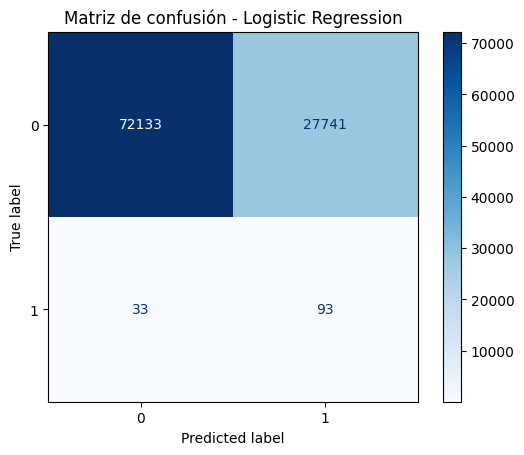

Entrenando Random Forest...
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     99874
           1       0.00      0.02      0.00       126

    accuracy                           0.99    100000
   macro avg       0.50      0.50      0.50    100000
weighted avg       1.00      0.99      0.99    100000



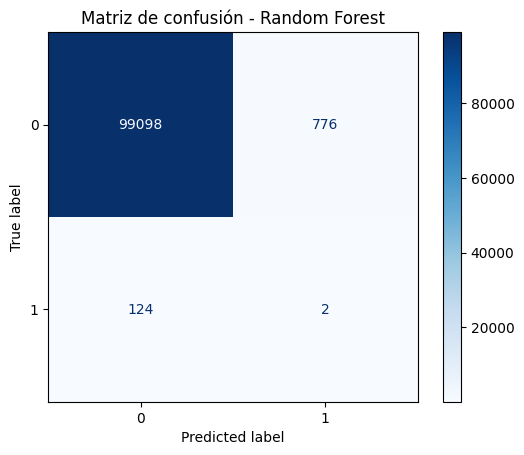

Entrenando Balanced Random Forest...
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     99874
           1       0.00      0.02      0.00       126

    accuracy                           0.99    100000
   macro avg       0.50      0.50      0.50    100000
weighted avg       1.00      0.99      0.99    100000



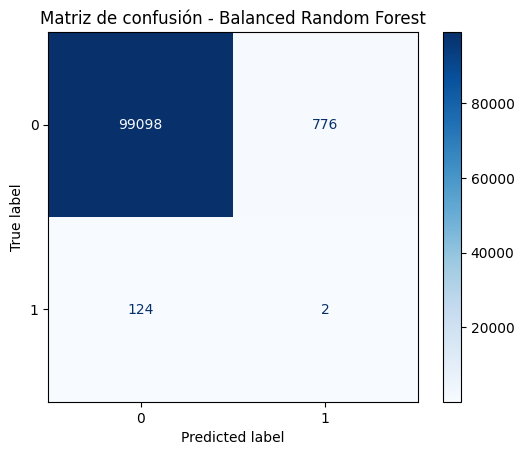

Entrenando XGBoost...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [00:41:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       1.00      0.99      1.00     99874
           1       0.00      0.01      0.00       126

    accuracy                           0.99    100000
   macro avg       0.50      0.50      0.50    100000
weighted avg       1.00      0.99      1.00    100000



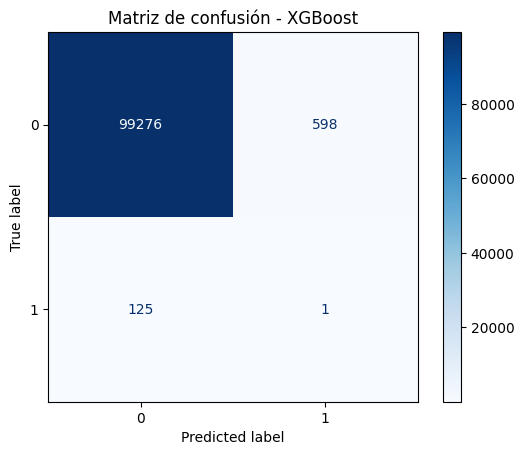

Entrenando Decision Tree...
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     99874
           1       0.00      0.02      0.00       126

    accuracy                           0.99    100000
   macro avg       0.50      0.50      0.50    100000
weighted avg       1.00      0.99      0.99    100000



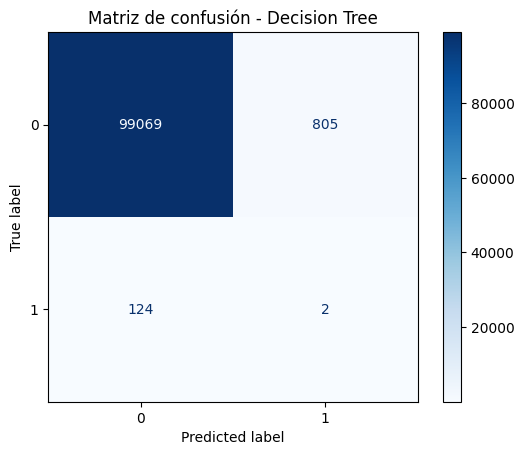


>>> El mejor modelo es: Logistic Regression con Recall=0.74

Resumen de métricas comparadas:
                        Accuracy        F1    Recall   ROC-AUC
Logistic Regression      0.72226  0.006652  0.738095  0.730168
Random Forest            0.99100  0.004425  0.015873  0.504052
Balanced Random Forest   0.99100  0.004425  0.015873  0.504052
XGBoost                  0.99277  0.002759  0.007937  0.500974
Decision Tree            0.99071  0.004287  0.015873  0.503906


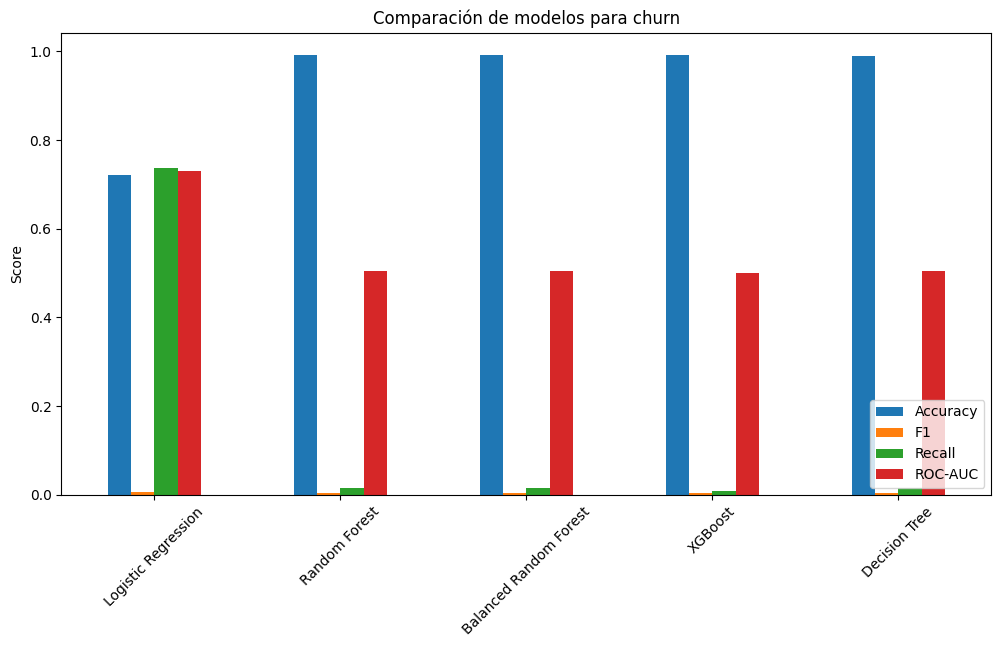

In [41]:

# ==============================================
# 7. models
# ==============================================

models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000),
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'Balanced Random Forest': BalancedRandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False,eval_metric="logloss",random_state=42),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced', random_state=42)
}

# ==============================================
# 8. Training and evaluation
# ==============================================

results = {}
predictions = {}
y_test_df = pd.DataFrame(y_test, columns=['churn'])

for model_name, model in models.items():
    print("="*70)
    print(f"Entrenando {model_name}...")

# Training
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

# Metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) if len(set(y_pred)) > 1 else 0.5

    results[model_name] = {"Accuracy": acc, "F1": f1, "Recall": recall, "ROC-AUC": roc_auc}
    predictions[model_name] = y_pred

# Detailed report
    print(classification_report(y_test, y_pred))

# Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap="Blues", values_format="d")
    plt.title(f"Matriz de confusión - {model_name}")
    plt.show()

# Save predictions
    y_test_df[model_name] = y_pred
    if y_pred_prob is not None:
        y_test_df[f"Propension_{model_name}"] = y_pred_prob

# ==============================================
# 9. Selection of the best model (based on recall)
# ==============================================
best_model_name = max(results, key=lambda k: results[k]['Recall'])
print(f"\n>>> El mejor modelo es: {best_model_name} con Recall={results[best_model_name]['Recall']:.2f}")

# ==============================================
# 10. Summary of results
# ==============================================
results_df = pd.DataFrame(results).T
print("\nResumen de métricas comparadas:")
print(results_df)

# ==============================================
# 11. Optional visualization (comparison of metrics)
# ==============================================

results_df[['Accuracy','F1','Recall','ROC-AUC']].plot(kind='bar', figsize=(12,6))
plt.title("Comparación de modelos para churn")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()


=== Importancia de variables (Logistic Regression) ===
             Variable  Coeficiente  Odds_Ratio  Importancia_Absoluta
24   GENERACION_MOVIL     2.224822    9.251833              2.224822
0            regional    -1.354906    0.257972              1.354906
1              ageing    -1.019556    0.360755              1.019556
6             rev_tot    -0.914575    0.400687              0.914575
7             data_mb    -0.910476    0.402333              0.910476
22         TIEMPO_AHT    -0.870069    0.418923              0.870069
16          CATEGORIA    -0.661341    0.516159              0.661341
4   DEVICE_TECHNOLOGY    -0.593431    0.552429              0.593431
3          TECHNOLOGY    -0.565414    0.568125              0.565414
5      DEVICE_SUBTYPE    -0.528145    0.589698              0.528145
20      TABANDONO_SEG     0.510079    1.665423              0.510079
17              CANAL     0.510079    1.665423              0.510079
19        TESPERA_SEG     0.487368    1.628026 

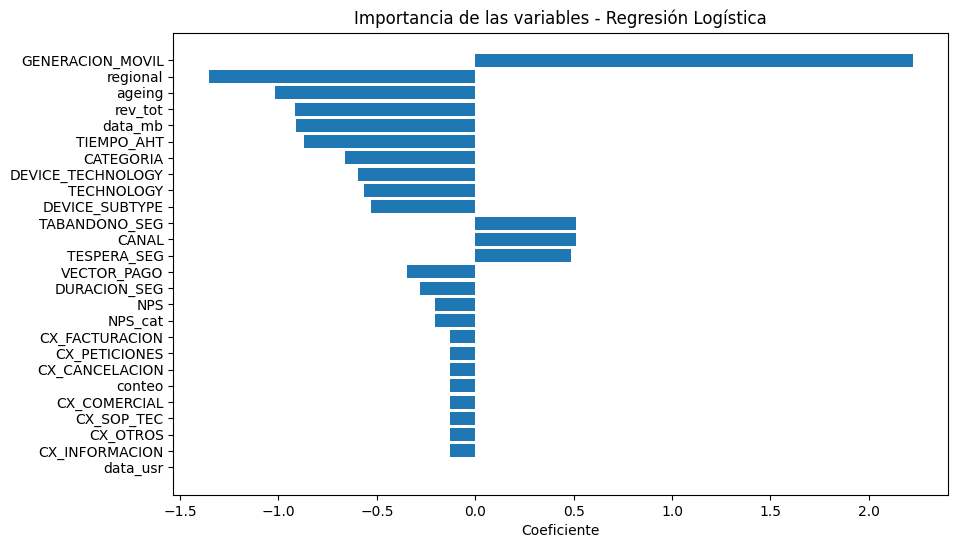

In [42]:
# ==============================================
# Importance of variables - logistic regression
# ==============================================

# Retrieve the model already entrenado
best_model = models['Logistic Regression']

# Coefficients and variable names
coef = best_model.coef_[0]
variables = X_train_res.columns

# DataFrame with results
importance_df = pd.DataFrame({
    "Variable": variables,
    "Coeficiente": coef,
    "Odds_Ratio": np.exp(coef),
    "Importancia_Absoluta": np.abs(coef)
}).sort_values(by="Importancia_Absoluta", ascending=False)

print("\n=== Importancia de variables (Logistic Regression) ===")
print(importance_df)

# Visualization
plt.figure(figsize=(10,6))
plt.barh(importance_df["Variable"], importance_df["Coeficiente"])
plt.xlabel("Coeficiente")
plt.title("Importancia de las variables - Regresión Logística")
plt.gca().invert_yaxis()
plt.show()


===== Isolation Forest =====
              precision    recall  f1-score   support

           0       1.00      0.90      0.95    499372
           1       0.00      0.21      0.01       628

    accuracy                           0.90    500000
   macro avg       0.50      0.55      0.48    500000
weighted avg       1.00      0.90      0.95    500000



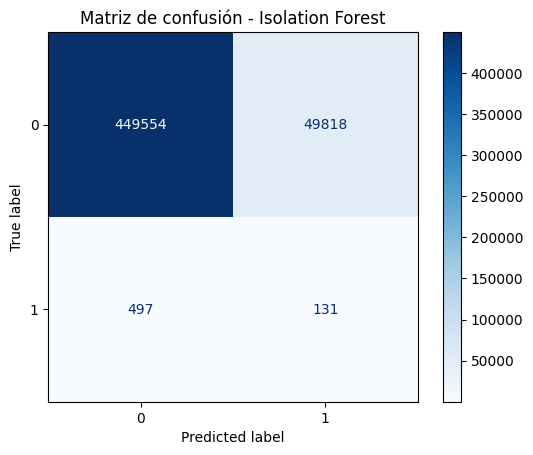


===== OneClass SVM (con muestreo) =====
              precision    recall  f1-score   support

           0       0.75      0.91      0.82      1884
           1       0.29      0.11      0.16       628

    accuracy                           0.71      2512
   macro avg       0.52      0.51      0.49      2512
weighted avg       0.64      0.71      0.66      2512



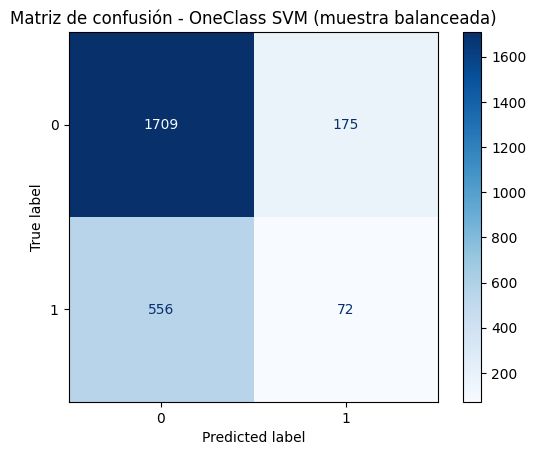


=== Resultados comparativos (no supervisados) ===
                       Accuracy        F1    Recall
Isolation Forest       0.899370  0.005180  0.208599
OneClass SVM (sample)  0.708997  0.164571  0.114650


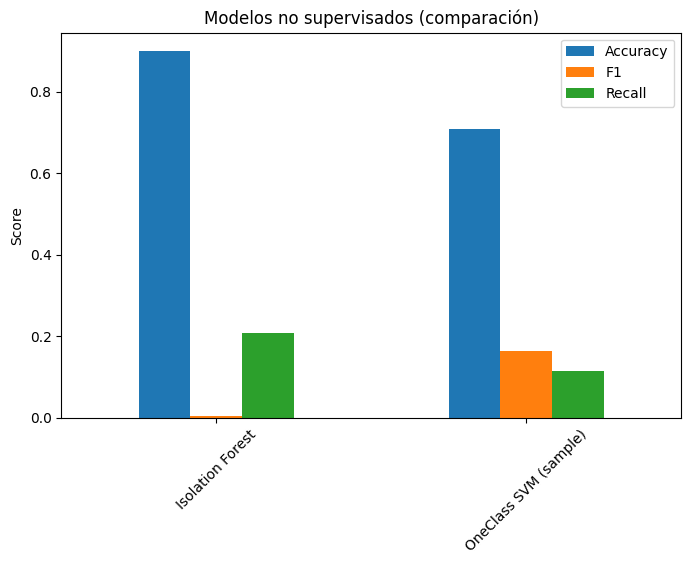

In [43]:
# ==============================================
# Unsupervised models: IsolationForest and OneClass SVM (with sampling)
# ==============================================

# Input dataset: x_df (already processed with WOE and label_encoder)
X = X_df.copy()
y_true = y.copy()

# ==============================================
# 1) Isolation Forest (on the entire dataset, fast)
# ==============================================
print("\n===== Isolation Forest =====")
iso = IsolationForest(random_state=42, contamination=0.1)
y_pred_iso = iso.fit_predict(X)

# Convert of {1, -1} → {0,1}
y_pred_iso = np.where(y_pred_iso == -1, 1, 0)

print(classification_report(y_true, y_pred_iso))
cm_iso = confusion_matrix(y_true, y_pred_iso)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_iso, display_labels=[0, 1])
disp.plot(cmap="Blues", values_format="d")
plt.title("Matriz de confusión - Isolation Forest")
plt.show()

# ==============================================
# 2) OneClass SVM with balanced sampling
# ==============================================
print("\n===== OneClass SVM (con muestreo) =====")

# Create a balanced dataset (equal proportion of churn=1 and churn=0)
df_full = X.copy()
df_full["target"] = y_true

df_minority = df_full[df_full["target"] == 1] # Churn=1
df_majority = df_full[df_full["target"] == 0] # Churn=0

# Undersample the majority class to balance
df_majority_sample = resample(
    df_majority,
    replace=False,
    n_samples=len(df_minority)*3, # You can adjust this factor
    random_state=42
)

df_sample = pd.concat([df_majority_sample, df_minority])
X_sample = df_sample.drop("target", axis=1)
y_sample_true = df_sample["target"]

# Train one-class SVM only on the sample
ocsvm = OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
y_pred_ocsvm = ocsvm.fit_predict(X_sample)

# Convert {1, -1} → {0,1}
y_pred_ocsvm = np.where(y_pred_ocsvm == -1, 1, 0)

print(classification_report(y_sample_true, y_pred_ocsvm))
cm_ocsvm = confusion_matrix(y_sample_true, y_pred_ocsvm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_ocsvm, display_labels=[0, 1])
disp.plot(cmap="Blues", values_format="d")
plt.title("Matriz de confusión - OneClass SVM (muestra balanceada)")
plt.show()

# ==============================================
# 3) Quick comparison (same sample sizes for comparison)
# ==============================================
results_unsup = pd.DataFrame({
    "Accuracy": [
        accuracy_score(y_true, y_pred_iso),
        accuracy_score(y_sample_true, y_pred_ocsvm)
    ],
    "F1": [
        f1_score(y_true, y_pred_iso),
        f1_score(y_sample_true, y_pred_ocsvm)
    ],
    "Recall": [
        recall_score(y_true, y_pred_iso),
        recall_score(y_sample_true, y_pred_ocsvm)
    ]
}, index=["Isolation Forest", "OneClass SVM (sample)"])

print("\n=== Resultados comparativos (no supervisados) ===")
print(results_unsup)

results_unsup.plot(kind="bar", figsize=(8,5))
plt.title("Modelos no supervisados (comparación)")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()